In [333]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")

from keras import models, regularizers, layers, optimizers, losses, metrics
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Flatten
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

Data Preparation

In [334]:
vocab_size = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)


In [335]:
# Display a sample sequence and its label
print("Sample review (numerical):", X_train[0])
print("Label (0: negative, 1: positive):", y_train[0])


Sample review (numerical): [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
Label (0: negative, 1: positive):

In [336]:
max_length = 100  # Maximum length for reviews
X_train = pad_sequences(X_train, maxlen=max_length, padding='post')
X_test = pad_sequences(X_test, maxlen=max_length, padding='post')

print("Padded sample review:", X_train[0])
print("Shape of X_train after padding:", X_train.shape)

Padded sample review: [1415   33    6   22   12  215   28   77   52    5   14  407   16   82
    2    8    4  107  117 5952   15  256    4    2    7 3766    5  723
   36   71   43  530  476   26  400  317   46    7    4    2 1029   13
  104   88    4  381   15  297   98   32 2071   56   26  141    6  194
 7486   18    4  226   22   21  134  476   26  480    5  144   30 5535
   18   51   36   28  224   92   25  104    4  226   65   16   38 1334
   88   12   16  283    5   16 4472  113  103   32   15   16 5345   19
  178   32]
Shape of X_train after padding: (25000, 100)


In [337]:
# Convert labels to NumPy arrays
y_train = np.array(y_train, dtype=np.int32)
y_test = np.array(y_test, dtype=np.int32)

Building the RNN Model

In [338]:
#Define the model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=max_length),
    LSTM(32),
    Dropout(0.5),
    Dense(1,
    activation='sigmoid', kernel_regularizer =l2(0.01))
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

Training the Model

In [339]:
X_train_part, X_val, y_train_part, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [340]:
print(type(X_train),X_train.dtype)

<class 'numpy.ndarray'> int32


In [341]:
model_1 = model.fit(
    X_train_part, y_train_part,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=32,
    callbacks=[EarlyStopping(monitor='val_accuracy',patience=4,
    restore_best_weights=True)],
    verbose= 1
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.5609 - loss: 0.7010 - val_accuracy: 0.7990 - val_loss: 0.5417
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.8127 - loss: 0.4807 - val_accuracy: 0.8342 - val_loss: 0.4118
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.8826 - loss: 0.3446 - val_accuracy: 0.8384 - val_loss: 0.4006
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.9070 - loss: 0.2863 - val_accuracy: 0.8412 - val_loss: 0.4106
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9240 - loss: 0.2502 - val_accuracy: 0.8362 - val_loss: 0.4438
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9374 - loss: 0.2222 - val_accuracy: 0.8308 - val_loss: 0.4712
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9457 - loss: 0.1982 - val_accuracy: 0.8296 - val_loss: 0.4711
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9548 - loss: 0.1831 - val

Evaluating the Model

In [342]:
# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Loss: 0.4345
Test Accuracy: 0.8279


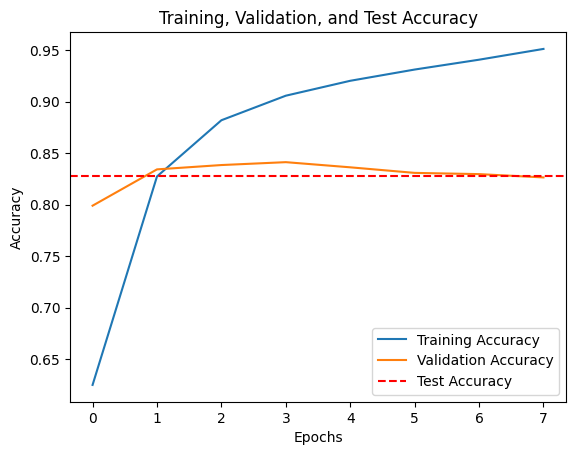

In [343]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(model_1.history['accuracy'], label='Training Accuracy')
plt.plot(model_1.history['val_accuracy'], label='Validation Accuracy')

# Add test accuracy as a horizontal line
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test Accuracy')

# Customize plot
plt.title('Training, Validation, and Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

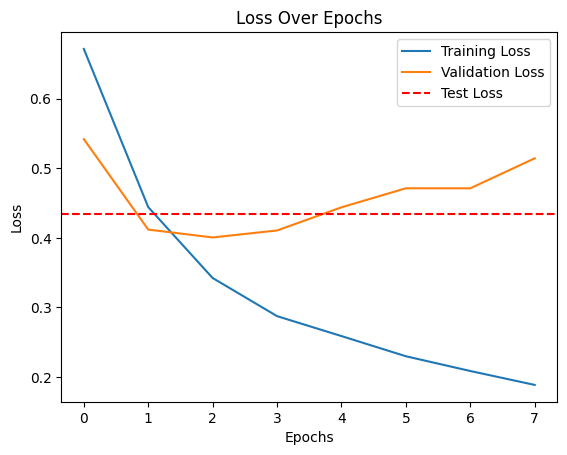

In [344]:
# Plot training and validation loss
plt.plot(model_1.history['loss'], label='Training Loss')
plt.plot(model_1.history['val_loss'], label='Validation Loss')

# Add test accuracy as a horizontal line
plt.axhline(y=test_loss, color='r', linestyle='--', label='Test Loss')

plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [345]:
# Define the FFNN model
ffnn_model = Sequential([
    # Embedding layer: Converts word indices to dense vectors
    Embedding(input_dim=10000, output_dim=128, input_length=100),
    
    # Flatten layer: Reduces (batch_size, sequence_length, embedding_dim)
    #                to (batch_size, sequence_length * embedding_dim)
    Flatten(),
    
    # Fully connected Dense layer
    Dense(64, activation='relu'),
    Dropout(0.3),  # Add dropout for regularization
    
    # Output layer: Single neuron for binary classification
    Dense(1, activation='sigmoid')
])

# Compile the FFNN model
ffnn_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [346]:
# Train the FFNN model
ffnn_history = ffnn_model.fit(
    X_train_part, y_train_part,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=64,
    callbacks=[EarlyStopping(patience=2, restore_best_weights=True)],
    verbose=1
)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6598 - loss: 0.5775 - val_accuracy: 0.8484 - val_loss: 0.3491
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9572 - loss: 0.1298 - val_accuracy: 0.8186 - val_loss: 0.4724
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9961 - loss: 0.0182 - val_accuracy: 0.8258 - val_loss: 0.5443


In [347]:
# Evaluate the FFNN model
ffnn_test_loss, ffnn_test_accuracy = ffnn_model.evaluate(X_test, y_test, verbose=0)

print(f"FFNN Test Accuracy: {ffnn_test_accuracy:.4f}")

FFNN Test Accuracy: 0.8374


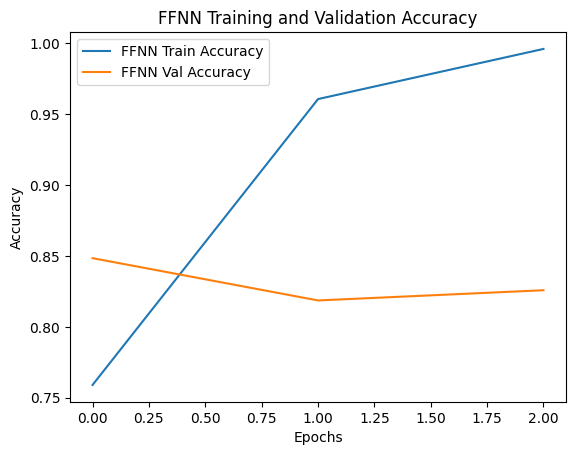

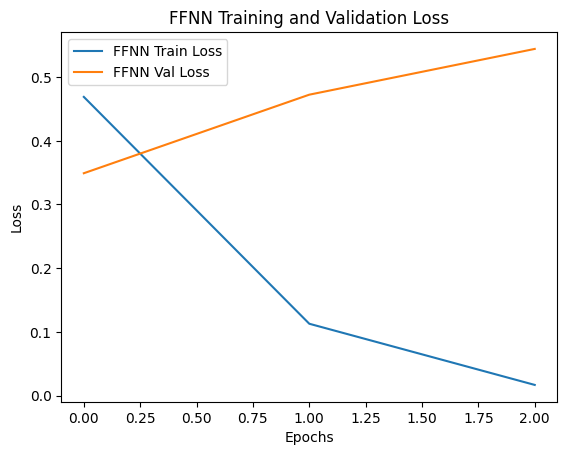

In [348]:
# Plot training and validation accuracy
plt.plot(ffnn_history.history['accuracy'], label='FFNN Train Accuracy')
plt.plot(ffnn_history.history['val_accuracy'], label='FFNN Val Accuracy')
plt.title('FFNN Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(ffnn_history.history['loss'], label='FFNN Train Loss')
plt.plot(ffnn_history.history['val_loss'], label='FFNN Val Loss')
plt.title('FFNN Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

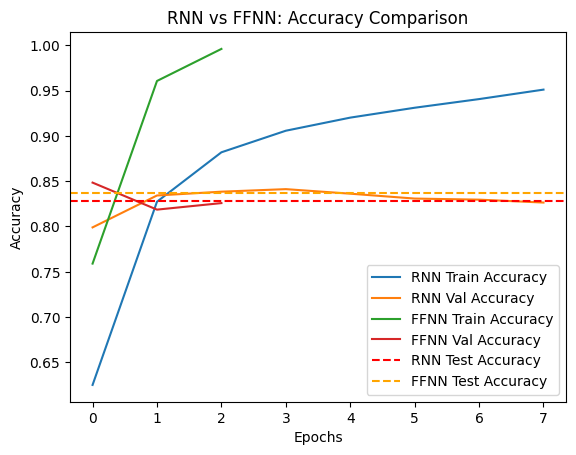

In [350]:
# RNN metrics
plt.plot(model_1.history['accuracy'], label='RNN Train Accuracy')
plt.plot(model_1.history['val_accuracy'], label='RNN Val Accuracy')

# FFNN metrics
plt.plot(ffnn_history.history['accuracy'], label='FFNN Train Accuracy')
plt.plot(ffnn_history.history['val_accuracy'], label='FFNN Val Accuracy')

# Add a horizontal line for test accuracy
plt.axhline(y=test_accuracy, color='red', linestyle='--', label='RNN Test Accuracy')
plt.axhline(y=ffnn_test_accuracy, color='orange', linestyle='--', label='FFNN Test Accuracy')

# Customize plot
plt.title('RNN vs FFNN: Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Findings

RNN:

1. Training accuracy (blue line) steadily improves over epochs.
2. Validation and test accuracy (orange and dashed red lines) are stable and relatively close to the training accuracy, showing that RNN generalizes well.
3. There’s a slight gap between training and validation, indicating overfitting starts to occur after a few epochs.

FFNN:

1. Training accuracy (green line) spikes very quickly to nearly 100%, indicating the model memorizes the training data.
2. Validation and test accuracy (solid red and dashed yellow lines) plateau around 82%–83%, showing a significant performance gap from training accuracy.


## Conclusion:
For the IMDB sentiment analysis task, RNN is the better model due to its ability to capture sequential dependencies, yielding higher accuracy and better generalization.

FFNN serves as a faster, simpler baseline but is not ideal for this type of task.